<center><h1><font style="color:red;">ASSIGNMENT 2</font></h1><br></center>
<h3>

* Name : Achal Rajesh Mate
* Roll No : 2203541
* Enroll No : MITU20BTCSD001
* Branch : CSE
* Class : TY CSE Is - 3
* Guided By : Prof Nagesh Jadhav Sir

<h3><font style="color:red;">Title:- </font>
   Download any dataset from UCI or Data.org or from any data repositories 
and perform the basic data pre-processing steps using Python/R
</h3>

<h3><font style="color:red;">Objectives:- </font> <br>
1. Learn to pre-process dataset<br>
2. Learn to use pandas and sklearn
 </h3>

<h3><font style="color:red;">Theory:</font></h3>

### 1. Description of basic data preprocessing steps.( Data cleaning, Standardization,Normalization, data splitting) 
### Basic steps
* <b>Step 1 :</b> Import the libraries
* <b>Step 2 :</b> Import the data-set
* <b>Step 3 :</b> Check out the missing values
* <b>Step 4 :</b> See the Categorical Values
* <b>Step 5 :</b> Splitting the data-set into Training and Test Set

### Data cleaning:
* The main aim of Data Cleaning is to identify and remove errors & duplicate data,in order to create a reliable dataset. 
* This improves the quality of the training data for analytics and enables accurate decision-making.
* Needless to say, data cleansing is a time-consuming process and most data scientists spend an enormous amount of time in enhancing the quality of the data. However, there are various methods to identify and classify data for data cleansing.
* There are mainly two distinct techniques, namely Qualitative and Quantitative techniques to classify data errors. 
* Qualitative techniques involve rules, constraints, and patterns to identify errors.
* On the other hand, Quantitative techniques employ statistical techniques to identify errors in the trained data.

### Normalisation:
* Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.
* Here’s the formula for normalization:

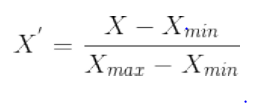
* Here, Xmax and Xmin are the maximum and the minimum values of the 
feature respectively.
    * When the value of X is the minimum value in the column, the numerator 
will be 0, and hence X’ is 0
    * On the other hand, when the value of X is the maximum value in the 
column, the numerator is equal to the denominator and thus the value 
of X’ is 1
    * If the value of X is between the minimum and the maximum value, then 
the value of X’ is between 0 and 1

### Standardisation:
* Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. 
* This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.
* Here’s the formula for standardization:


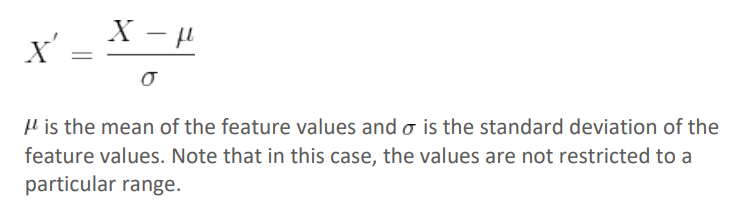

### Splitting the Dataset
* X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)
* Split arrays or matrices into random train and test subsets
* Quick utility that wraps input validation and next(ShuffleSplit().split(X, y)) and application to input data into a 
single call for splitting (and optionally subsampling) data in a oneliner.

* Imputer(missing_values='NaN', strategy='mean', axis=0)
* Imputation transformer for completing missing values.

### pandas.read_csv()
* Read a comma-separated values (csv) file into DataFrame.
* Also supports optionally iterating or breaking of the file into chunks.

### Dataset used and its attributes

<b>DataSet Link : </b> https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)<br>
<b>Dataset Information :</b>Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.


<b>Features Explanations:</b>
* Number of Instances: 569
* Number of Attributes: 30 numeric, predictive attributes and the class
#### Attribute Information:
- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)

* The mean, standard error, and "worst" or largest (mean of the three largest values) of these features were computed for each data, resulting in 30 features. 
For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius. 
* Missing Values: 569 
* Class Distribution: 
    * 212 - Malignant, 
    * 357 - Benign
Depending on the types of cells in a tumor, it can be:
* Benign - The tumor doesn’t contain cancerous cells.
* Malignant - The tumor contains cancerous cells.

<br>


### Import All Necessary Library

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [ ]:
from sklearn import preprocessing
from scipy.stats import norm
from sklearn.model_selection import train_test_split

### Load the DataSet

In [ ]:
df = pd.read_csv("Breast Cancer Data.csv")

In [ ]:
df.head()

### View First 5 Rows

In [ ]:
df.head()

### Set Option to View all Rows and Columns

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Dimensions of the Dataset

In [ ]:
df.shape

Dataset contains 569 instances with 33 rows

### Concise Summary

In [ ]:
df.info()

From above result diagnosis is the feature in object datatype and  Unnamed: 32 feature contains all now value 
lets check by using pandas function

### Check the Missing Data

In [ ]:
df.isnull().sum()

From the above observation Unnamed: 32 column contains all the Null values<br>
So it would be better to drop the column

#### Drop the Column Containing Missing Value

In [ ]:
df.drop('Unnamed: 32',axis = 1,inplace = True)

#### Recheck the Missing Value is present or not

In [ ]:
df.isnull().sum().sum()

### Statistical Summary of data

In [ ]:
df.describe()

### Columns of the dataset

In [ ]:
df.columns

### Check The types of values of Diagnosis Present In dataset

In [ ]:
df.diagnosis.unique()

### Count number of Malignant (M) or Benign (B) Cells

In [ ]:
df['diagnosis'].value_counts()

From above result we can say that M=Maligant is of 212 instance which is postive prediction <br> B= Benign is of 357 instance which is negative prediction

In [ ]:
sns.countplot('diagnosis',data=df,label ="Diagnosis")


Dataset Contain Maximum Number of Negative Predictions 

### Univatiate Analysis

#### Check the outlier in the dataset

In [ ]:
data = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [ ]:
def box_plot_wiskers(feature):
    sns.set_style('whitegrid')
    out_marker = dict(markerfacecolor='yellow',markeredgecolor = 'black', marker='o', markersize = 12)
    plt.figure(figsize=(15,5))
    plt.title(feature ,fontsize = 20) 
    plt.xlabel(feature , fontsize = 15)  
    

    
    boxplot = sns.boxplot(df[feature],color='orange',
                          showmeans=True,  
                          notch = True,
                          flierprops=out_marker,
                          meanprops={ "marker":"o",
                                    "markerfacecolor":"red", 
                                    "markeredgecolor":"black",
                                    "markersize":"8"})
    

In [ ]:
for clm in data:
    box_plot_wiskers(clm)

In [ ]:
for i in df.columns[3:]:
    Q1,Q3 = np.quantile(df[i],[0.25,0.75])
    IQR = Q3-Q1
    lower_bound = Q1 - (1.5*IQR)
    if lower_bound < 0:  # as in whole dataset there is no -ve value hence we set lowerbound to 0
        lower_bound=0
    upper_bound = Q3 + (1.5*IQR)
    print(i)
    print('Lower Bound =',np.round(lower_bound,2),' Upper Bound =',np.round(upper_bound,2))
    print('min value =',df[i].min(), ' max value =', df[i].max())

    if df[i].min() < lower_bound:
        print('negative Outliers',len(df[(df[i]<lower_bound)]))
    
    if df[i].max() > upper_bound:
        print('positive Outliers', len(df[(df[i]>upper_bound)]))  
        
   
        
       
    
    print('='*50)

### Data Distribution of Each feature

In [ ]:
for clm in df.columns[2:]:    
    sns.set_style('whitegrid')    
    plt.figure(figsize=(15,5))
    plt.title(clm+' Distribution ',fontsize = 20) 
    plt.xlabel(clm , fontsize = 15) 
    sns.distplot(df[clm],color='r' , label=clm+' Distribution')

    rang = np.arange(df[clm].min(),df[clm].max(),0.1)
    plt.plot(rang, norm.pdf(rang,df[clm].mean(),df[clm].std()),color='black', ls='--',lw =3,label = 'Bell Curve')
    plt.legend(fontsize= 15)

### Distribution density plot KDE (kernel density estimate)

In [ ]:
for clm in data:
    sns.FacetGrid(df, hue="diagnosis", height=6).map(sns.kdeplot, clm).add_legend()
    plt.title(clm,fontsize=15)
    plt.show()

###  Plotting Bivariate  relations between  features and diagnosis

In [ ]:
 

plt.figure(figsize=(10,5))
plt.suptitle("Correlation between diagnosis and radius",fontsize=15)
plt.subplot(1,2,1)
sns.boxplot(x="diagnosis", y="radius_mean", data=df)
plt.xlabel('Diagnosis',fontsize=10)
plt.ylabel("Radius mean",fontsize=10)
plt.subplot(1,2,2)
sns.violinplot(x="diagnosis", y="radius_mean", data=df)
plt.xlabel('Diagnosis',fontsize=10)
plt.ylabel("Radius mean",fontsize=10)
plt.show()

In [ ]:
# Plotting 

plt.figure(figsize=(10,5))
plt.suptitle("correlation between diagnosis and concativity",fontsize=15)
plt.subplot(1,2,1)
sns.boxplot(x="diagnosis", y="concavity_mean", data=df)
plt.xlabel('Diagnosis',fontsize=10)
plt.ylabel("Concavity mean",fontsize=10)
plt.subplot(1,2,2)
sns.violinplot(x="diagnosis", y="concavity_mean", data=df)
plt.xlabel('Diagnosis',fontsize=10)
plt.ylabel("Concavity mean",fontsize=10)
plt.show()

More outliers are present in 'B' in correlation with concativity than 'M' type of diagnosis

###  Plotting Multivariate  relations between each pair of features  hue = "diagnosis"

#### PairPlot between Mean Features with Diagnosis

In [ ]:
df_mean = df[['diagnosis',
        'radius_mean', 
        'texture_mean', 
        'perimeter_mean', 
        'area_mean', 
        'smoothness_mean', 
        'compactness_mean', 
        'concavity_mean',
        'concave points_mean', 
        'symmetry_mean', 
        'fractal_dimension_mean']]

sns.pairplot(data=df_mean, hue='diagnosis', palette=('Orange','DarkBlue'))


From the above pair plot we can say that data is highly correlated with ecah other

In [ ]:
### Pairplot between Squared Error Features with Diagnosis

In [ ]:
df_se = df[['diagnosis',
        'radius_se', 
        'texture_se', 
        'perimeter_se', 
        'area_se', 
        'smoothness_se', 
        'compactness_se', 
        'concavity_se',
        'concave points_se', 
        'symmetry_se', 
        'fractal_dimension_se']]
sns.pairplot(data=df_se, hue='diagnosis', palette=('Orange','DarkBlue'))


From the above pair plot we can say that data is some how  correlated with ecah other

In [ ]:
### Pairplot between  Worst Error Features with Diagnosis

In [ ]:
df_worst = df[['diagnosis',
        'radius_worst', 
        'texture_worst', 
        'perimeter_worst', 
        'area_worst', 
        'smoothness_worst', 
        'compactness_worst', 
        'concavity_worst',
        'concave points_worst', 
        'symmetry_worst', 
        'fractal_dimension_worst']]

sns.pairplot(data=df_worst, hue='diagnosis', palette=('Orange','DarkBlue'))


#### From aboove pairplots we can clearly say that data is highly colinear with each other 

### Correlation Between Data

In [ ]:
plt.figure(figsize=(20,20))
plt.title("Heatmap of Correlation matrix ",fontsize=15)
sns.heatmap(df.corr(), annot = True, cmap ='coolwarm', linewidths=2)

In [ ]:
df.corr(method='spearman')

## Data Preprocessing -
### Feature elemination

In [ ]:
# feature is not for our use as it consist of id of the patient
df.drop('id',axis=1,inplace= True) 

In [ ]:
df.isnull().sum().sum()

### Feature encoding 
#### Converting Categorical features into numberic features

In [ ]:
le = preprocessing.LabelEncoder()
df['diagnosis']=le.fit_transform(df['diagnosis'])

In [ ]:
df['diagnosis'].unique()

In [ ]:
df.head()

#### Now our data is ready to pass the model and perform ML building.

In [ ]:
cancer_pos_rate = np.sum(df.diagnosis) / len(df.diagnosis) *100
print('Breast Cancer +ve rate - ',cancer_pos_rate)

##### The given dataset contains only 3.7 % of cancer +ve data which is balance data for building accurate model.

## Spliting Dataset for Feature Selection of Model Building

In [ ]:
data = df.copy()
data.head()

In [ ]:
data.shape,data.isnull().sum().sum()

#### The process dataset contain 569 instance ,31 columns including target variable and zero null values

In [ ]:
X =data.drop(['diagnosis'],axis = 1)
y = data['diagnosis']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

#### Data is split into train and testing part

In [ ]:
X_train.shape , X_test.shape, y_train.shape, y_test.shape

#### Calculating the feature correlated to Target variable

In [ ]:
plt.figure(figsize = (16,5))
plt.title("Correlation barplot",fontsize= 20)
ax = sns.barplot(data.corrwith(df.diagnosis).index, data.corrwith(data.diagnosis))

ax.tick_params(labelrotation = 90)

#### from the above figure we can say that concave points_worst,radius_worst,perimeter_worst,concave points_means contributes toward target varibale more than other features

### Conclusion 
Thus we have successfully implemented pre-processing operations on a dataset
